In [3]:
#import libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score, recall_score

RSEED = 42


In [4]:
#load data
df = pd.read_csv('data/Train.csv')
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
df.tail()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


<AxesSubplot:xlabel='bank_account', ylabel='count'>

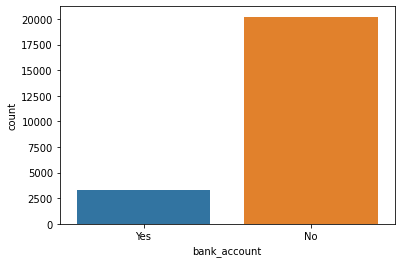

In [8]:
sns.countplot(data=df,x='bank_account',)

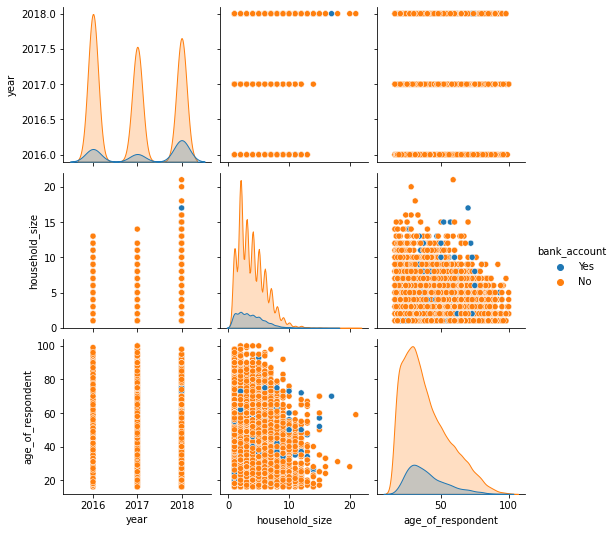

In [9]:
sns.pairplot(df, hue='bank_account')

In [10]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [11]:
df.year.value_counts()

2016    8735
2018    8169
2017    6620
Name: year, dtype: int64

In [12]:
df.country.value_counts()

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64

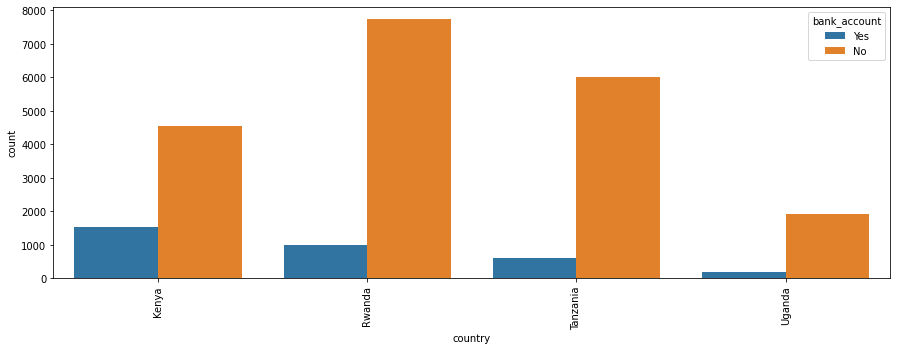

In [13]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='country',data=df,hue='bank_account')
plt.xticks(rotation=90);

In [14]:
df.bank_account.value_counts()

No     20212
Yes     3312
Name: bank_account, dtype: int64

In [15]:
df.location_type.value_counts()

Rural    14343
Urban     9181
Name: location_type, dtype: int64

In [16]:
df.cellphone_access.value_counts()

Yes    17454
No      6070
Name: cellphone_access, dtype: int64

In [17]:
df.job_type.value_counts()

Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: job_type, dtype: int64

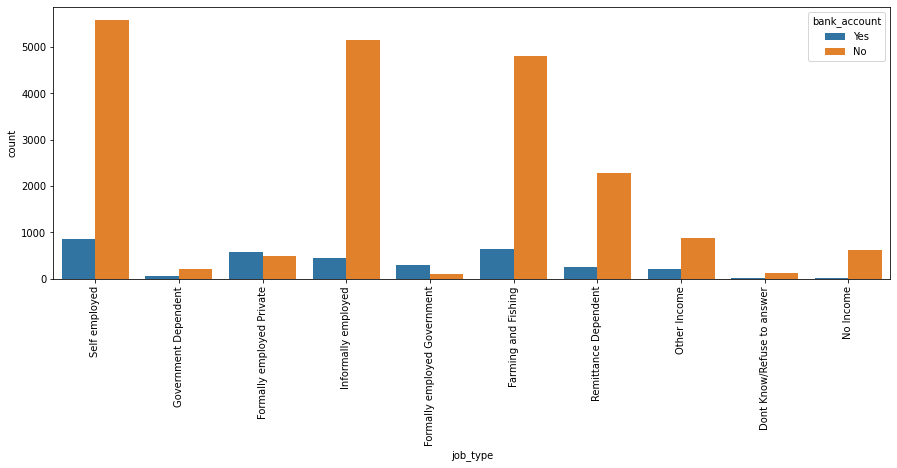

In [18]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='job_type',data=df,hue='bank_account')
plt.xticks(rotation=90);

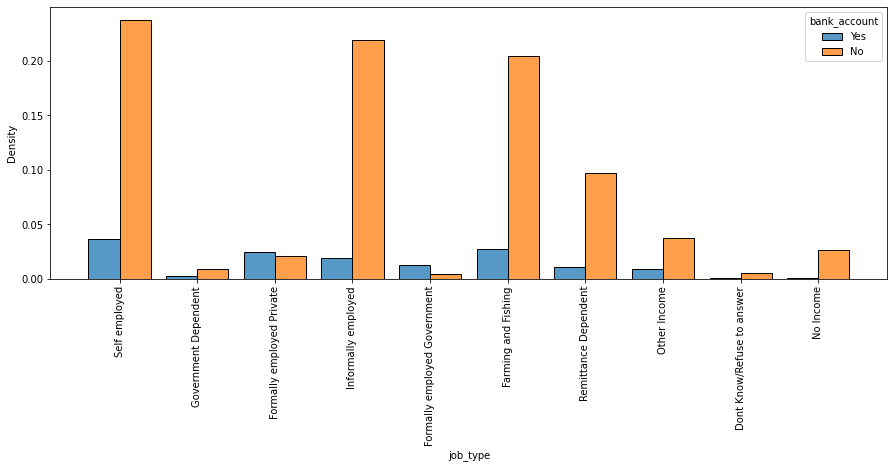

In [19]:
plt.figure(figsize=(15,5))
fig = sns.histplot(x = df['job_type'], hue=df['bank_account'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=True)
plt.xticks(rotation=90);

<Figure size 1080x360 with 0 Axes>

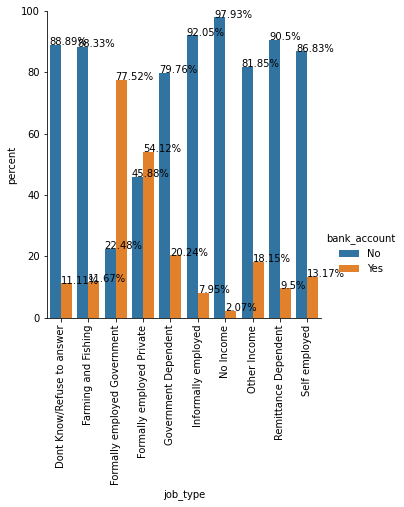

In [20]:
plt.figure(figsize=(15,5))

x,y = 'job_type', 'bank_account'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)
plt.xticks(rotation=90);
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

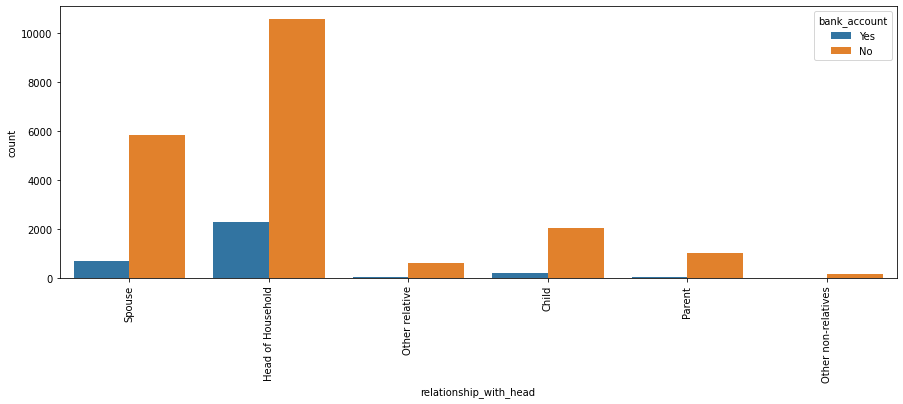

In [21]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='relationship_with_head',data=df,hue='bank_account')
plt.xticks(rotation=90);

In [22]:
df.marital_status.value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

In [23]:
df.education_level.value_counts()

Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: education_level, dtype: int64

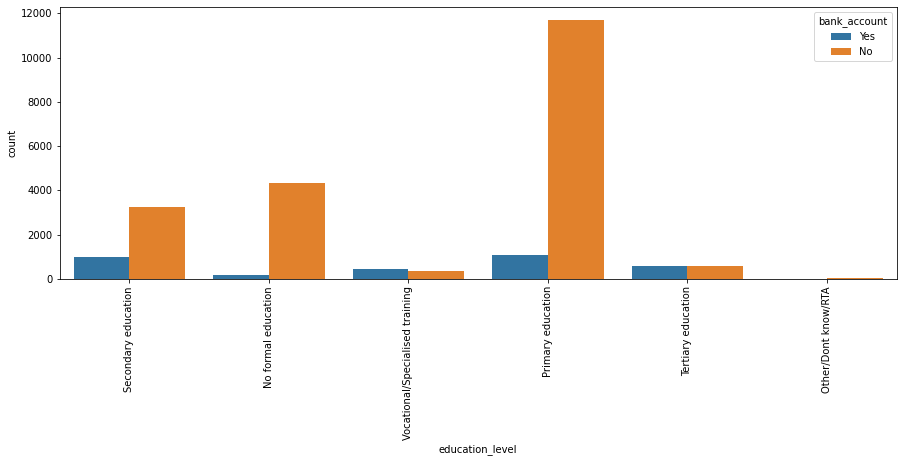

In [24]:
plt.figure(figsize=(15,5))
fig = sns.countplot(x='education_level',data=df,hue='bank_account')
plt.xticks(rotation=90);

In [25]:
df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [26]:
y = df.bank_account
X = df.drop(['bank_account','uniqueid'],axis=1)

In [27]:
#create dummies
# define list of categorical features
cat_feat = ['country', 'year',  'location_type',
       'cellphone_access', 
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type']

In [28]:
X = pd.get_dummies(X,columns=cat_feat,drop_first=True)
X.head()

,household_size,age_of_respondent,country_Rwanda,country_Tanzania,country_Uganda,year_2017,year_2018,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,3,24,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5,70,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5,26,0,0,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,1
3,5,34,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,8,26,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RSEED,stratify=y)

In [ ]:
#transform strings to numbers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train =le.fit_transform(y_train)
y_test = le.transform(y_test)
len(y_test)


5881

In [ ]:
#non-algorithmic baseline model
def my_baseline(df):
    y_pred = [0 if x == 0 else 1 for x in X['education_level_Tertiary education']]
    return y_pred

# predict values with baseline model
y_baseline_test = my_baseline(X_test)
print(len(y_test))
print(len(y_baseline_test))

print('Recall on test:', recall_score(y_test,y_baseline_test))
print('F1-score on test:', f1_score(y_test,y_baseline_test))
print(classification_report(y_test,y_baseline_test))

# Confusion matrix using pandas crosstab
confusion_matrix = pd.crosstab(y_test, y_baseline_test)
sns.heatmap(confusion_matrix, annot=True);

5881
5881
Recall on test: 0.9698067632850241
F1-score on test: 0.30973963355834144
              precision    recall  f1-score   support

           0       0.98      0.30      0.46      5053
           1       0.18      0.97      0.31       828

    accuracy                           0.39      5881
   macro avg       0.58      0.63      0.38      5881
weighted avg       0.87      0.39      0.44      5881



ValueError: Image size of 277041x265 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 2 Axes>

0.859207617752083
F1-score on test: 0.0
Recall on test: 0.0
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      5053
           1       0.00      0.00      0.00       828

    accuracy                           0.86      5881
   macro avg       0.43      0.50      0.46      5881
weighted avg       0.74      0.86      0.79      5881



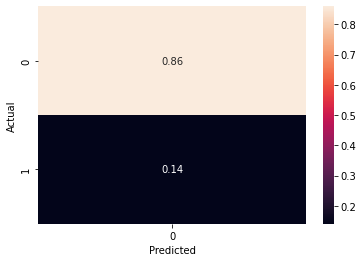

In [ ]:
#dummy classifier as baseline (Zero Rule)
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent') # most frequent = predicting always the majority class (ZeroR)
dummy_clf.fit(X_train,y_train)
y_pred = dummy_clf.predict(X_test)
print(dummy_clf.score(X_test,y_test))
print('F1-score on test:', f1_score(y_test,y_pred))
print('Recall on test:', recall_score(y_test,y_pred))

print(classification_report(y_test,y_pred))
# Confusion matrix using pandas crosstab
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'],normalize=True)
sns.heatmap(confusion_matrix, annot=True);


0.8833531712293827
F1-score on test: 0.4529505582137161
Recall: 0.34299516908212563
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      5053
           1       0.67      0.34      0.45       828

    accuracy                           0.88      5881
   macro avg       0.78      0.66      0.69      5881
weighted avg       0.87      0.88      0.87      5881



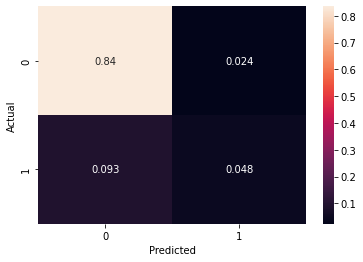

In [ ]:
#baselinemodel
#logistic regression 
# Modelling



logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
print(logistic_regression.score(X_test,y_test))
print('F1-score on test:', f1_score(y_test,y_pred))
print('Recall:', recall_score(y_test,y_pred))
print("--------"*10)
print(classification_report(y_test,y_pred))

# Confusion matrix using pandas crosstab
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'],normalize=True)
sns.heatmap(confusion_matrix, annot=True);